# **2. Exploratory Data Analysis**

## **Part 0: Import Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import pickle
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)

In [2]:
filepath = '/Volumes/My Passport for Mac/ipl-player-salary/FinalDFs/'

# **Part 1: Batting**

### **(I) Loading and Cleaning the data**

In [3]:
batting_file = filepath + 'batting_merged.pkl'

# Load the .pkl file as a dataframe
batting_df = pd.read_pickle(batting_file)
batting_df.head()

,Player,Country,Role,Season,Team,SalaryUSD,MatchCount,SeasonCount,phase,balls_faced,total_runs,batting_avg,strike_rate,boundary_prob,wicket_prob
32,AB de Villiers,South Africa,Wicketkeeper batsman,2008,Delhi Daredevils,300000,6,1,1.0,30.0,28.0,14.00,93.333333,0.100000,0.066667
33,AB de Villiers,South Africa,Wicketkeeper batsman,2008,Delhi Daredevils,300000,6,1,2.0,63.0,59.0,29.50,93.650794,0.031746,0.031746
34,AB de Villiers,South Africa,Wicketkeeper batsman,2008,Delhi Daredevils,300000,6,1,3.0,7.0,8.0,8.00,114.285714,0.142857,0.000000
29,AB de Villiers,South Africa,Wicketkeeper batsman,2009,Delhi Daredevils,300000,15,2,1.0,65.0,61.0,30.50,93.846154,0.138462,0.030769
30,AB de Villiers,South Africa,Wicketkeeper batsman,2009,Delhi Daredevils,300000,15,2,2.0,239.0,287.0,71.75,120.083682,0.104603,0.016736


In [4]:
# Turn the match count into an integer
batting_df.MatchCount = batting_df.MatchCount.astype('int')
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1526 entries, 32 to 1504
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         1526 non-null   object 
 1   Country        1526 non-null   object 
 2   Role           1526 non-null   object 
 3   Season         1526 non-null   object 
 4   Team           1526 non-null   object 
 5   SalaryUSD      1526 non-null   int64  
 6   MatchCount     1526 non-null   int64  
 7   SeasonCount    1526 non-null   int64  
 8   phase          1524 non-null   float64
 9   balls_faced    1524 non-null   float64
 10  total_runs     1524 non-null   float64
 11  batting_avg    1524 non-null   float64
 12  strike_rate    1524 non-null   float64
 13  boundary_prob  1524 non-null   float64
 14  wicket_prob    1524 non-null   float64
dtypes: float64(7), int64(3), object(5)
memory usage: 190.8+ KB


In [5]:
# Let us turn this into one row for each player for each year.
batting_pivot = batting_df.pivot(['Player', 'Country', 'Role', 'Season', 'Team', 'SalaryUSD', 'MatchCount', 'SeasonCount'], columns='phase')
# Change the column names
batting_pivot.columns = [f'{col[0]}_{col[1]}' for col in batting_pivot.columns]
# reset the index
batting_pivot.reset_index(inplace=True)
# remove the unnecessary columns
batting_filtered = batting_pivot.filter(regex='^(?!.*_nan$)')
batting_filtered.tail()

,Player,Country,Role,Season,Team,SalaryUSD,MatchCount,SeasonCount,balls_faced_1.0,balls_faced_2.0,...,batting_avg_3.0,strike_rate_1.0,strike_rate_2.0,strike_rate_3.0,boundary_prob_1.0,boundary_prob_2.0,boundary_prob_3.0,wicket_prob_1.0,wicket_prob_2.0,wicket_prob_3.0
585,Yuvraj Singh,India,Middle-order batsman,2015,Delhi Daredevils,2666667,14,7,21.0,167.0,...,8.000000,95.238095,112.574850,148.148148,0.190476,0.137725,0.222222,0.0000,0.047904,0.185185
586,Yuvraj Singh,India,Middle-order batsman,2016,Sunrisers Hyderabad,1050000,10,8,5.0,149.0,...,15.333333,120.000000,123.489933,158.620690,0.200000,0.174497,0.275862,0.0000,0.046980,0.103448
587,Yuvraj Singh,India,Middle-order batsman,2017,Sunrisers Hyderabad,1050000,12,9,3.0,136.0,...,17.800000,133.333333,116.911765,181.632653,0.333333,0.161765,0.306122,0.0000,0.036765,0.102041
588,Yuvraj Singh,India,Middle-order batsman,2018,Kings XI Punjab,312500,8,10,16.0,54.0,...,1.000000,87.500000,92.592593,25.000000,0.187500,0.092593,0.000000,0.0625,0.055556,0.250000
589,Yuvraj Singh,India,Middle-order batsman,2019,Mumbai Indians,142900,4,11,NaN,74.0,...,6.000000,NaN,124.324324,66.666667,NaN,0.162162,0.111111,NaN,0.040541,0.111111


In [6]:
# Let us now check for NaN values
bat_columns_with_nan = batting_filtered.columns[batting_filtered.isna().any()].tolist()
print(bat_columns_with_nan)

# Since all of these are numeric columns, we will fill these NaN values with 0.
for col in bat_columns_with_nan:
    batting_filtered[col].fillna(0, inplace=True)

batting_filtered.tail()

['balls_faced_1.0', 'balls_faced_2.0', 'balls_faced_3.0', 'total_runs_1.0', 'total_runs_2.0', 'total_runs_3.0', 'batting_avg_1.0', 'batting_avg_2.0', 'batting_avg_3.0', 'strike_rate_1.0', 'strike_rate_2.0', 'strike_rate_3.0', 'boundary_prob_1.0', 'boundary_prob_2.0', 'boundary_prob_3.0', 'wicket_prob_1.0', 'wicket_prob_2.0', 'wicket_prob_3.0']


,Player,Country,Role,Season,Team,SalaryUSD,MatchCount,SeasonCount,balls_faced_1.0,balls_faced_2.0,...,batting_avg_3.0,strike_rate_1.0,strike_rate_2.0,strike_rate_3.0,boundary_prob_1.0,boundary_prob_2.0,boundary_prob_3.0,wicket_prob_1.0,wicket_prob_2.0,wicket_prob_3.0
585,Yuvraj Singh,India,Middle-order batsman,2015,Delhi Daredevils,2666667,14,7,21.0,167.0,...,8.000000,95.238095,112.574850,148.148148,0.190476,0.137725,0.222222,0.0000,0.047904,0.185185
586,Yuvraj Singh,India,Middle-order batsman,2016,Sunrisers Hyderabad,1050000,10,8,5.0,149.0,...,15.333333,120.000000,123.489933,158.620690,0.200000,0.174497,0.275862,0.0000,0.046980,0.103448
587,Yuvraj Singh,India,Middle-order batsman,2017,Sunrisers Hyderabad,1050000,12,9,3.0,136.0,...,17.800000,133.333333,116.911765,181.632653,0.333333,0.161765,0.306122,0.0000,0.036765,0.102041
588,Yuvraj Singh,India,Middle-order batsman,2018,Kings XI Punjab,312500,8,10,16.0,54.0,...,1.000000,87.500000,92.592593,25.000000,0.187500,0.092593,0.000000,0.0625,0.055556,0.250000
589,Yuvraj Singh,India,Middle-order batsman,2019,Mumbai Indians,142900,4,11,0.0,74.0,...,6.000000,0.000000,124.324324,66.666667,0.000000,0.162162,0.111111,0.0000,0.040541,0.111111


In [7]:
# Let us now keep track of when a player changed teams
batting_filtered['changed_teams'] = 0
changed_teams_years = (batting_filtered['Player'] == batting_filtered['Player'].shift(1)) & (batting_filtered['Team'] != batting_filtered['Team'].shift(1))
batting_filtered.loc[changed_teams_years, 'changed_teams'] = 1
batting_filtered[batting_filtered['Player'] == 'AJ Finch']

# Let us also keep track of the next-year salary
batting_filtered['NY_SalaryUSD'] = np.nan
player_change = (batting_filtered['Player'] != batting_filtered['Player'].shift(-1))
batting_filtered.loc[~player_change, 'NY_SalaryUSD'] = batting_filtered['SalaryUSD'].shift(-1)
batting_filtered['NY_SalaryUSD'] = batting_filtered['NY_SalaryUSD'].astype('float')

# Reorder the columns
salary_index = batting_filtered.columns.get_loc('SalaryUSD')
batting_cols = list(batting_filtered.columns)
batting_cols.remove('NY_SalaryUSD')
batting_cols.insert(salary_index, 'NY_SalaryUSD')
batting_filtered = batting_filtered[batting_cols]

batting_filtered.head()

,Player,Country,Role,Season,Team,NY_SalaryUSD,SalaryUSD,MatchCount,SeasonCount,balls_faced_1.0,...,strike_rate_1.0,strike_rate_2.0,strike_rate_3.0,boundary_prob_1.0,boundary_prob_2.0,boundary_prob_3.0,wicket_prob_1.0,wicket_prob_2.0,wicket_prob_3.0,changed_teams
0,AB de Villiers,South Africa,Wicketkeeper batsman,2008,Delhi Daredevils,300000.0,300000,6,1,30.0,...,93.333333,93.650794,114.285714,0.100000,0.031746,0.142857,0.066667,0.031746,0.000000,0
1,AB de Villiers,South Africa,Wicketkeeper batsman,2009,Delhi Daredevils,300000.0,300000,15,2,65.0,...,93.846154,120.083682,212.727273,0.138462,0.104603,0.309091,0.030769,0.016736,0.054545,0
2,AB de Villiers,South Africa,Wicketkeeper batsman,2010,Delhi Daredevils,1100000.0,300000,7,3,53.0,...,90.566038,90.000000,0.000000,0.113208,0.014286,0.000000,0.000000,0.100000,0.000000,0
3,AB de Villiers,South Africa,Wicketkeeper batsman,2011,Royal Challengers Bangalore,1100000.0,1100000,16,4,36.0,...,91.666667,113.095238,202.272727,0.138889,0.113095,0.250000,0.027778,0.023810,0.068182,1
4,AB de Villiers,South Africa,Wicketkeeper batsman,2012,Royal Challengers Bangalore,1100000.0,1100000,15,5,7.0,...,128.571429,116.129032,230.555556,0.142857,0.096774,0.388889,0.142857,0.032258,0.041667,0


### **(II) Initial Visualizations**

My initial thought process here was that the players which garner big prices will usually go for big prices. Let's see if that's true.

In [14]:
# drop the rows which are missing the next year salary
# drop instances of when the next year salary and current salary are the same - usually that means the player went for the base price at the auction.
salary_salary_df = batting_filtered.dropna(subset=['NY_SalaryUSD'])
salary_salary_df = salary_salary_df[salary_salary_df['NY_SalaryUSD'] != salary_salary_df['SalaryUSD']]

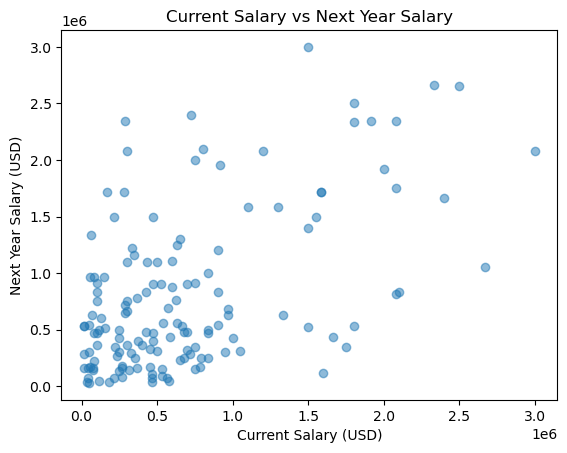

In [15]:
plt.scatter(salary_salary_df['SalaryUSD'], salary_salary_df['NY_SalaryUSD'], alpha=.5)
plt.xlabel("Current Salary (USD)")
plt.ylabel("Next Year Salary (USD)")
plt.title("Current Salary vs Next Year Salary")
plt.show()

What about when players change their teams? I am also ignoring when they go for the same price from year to year - usually this is when they go for base price.

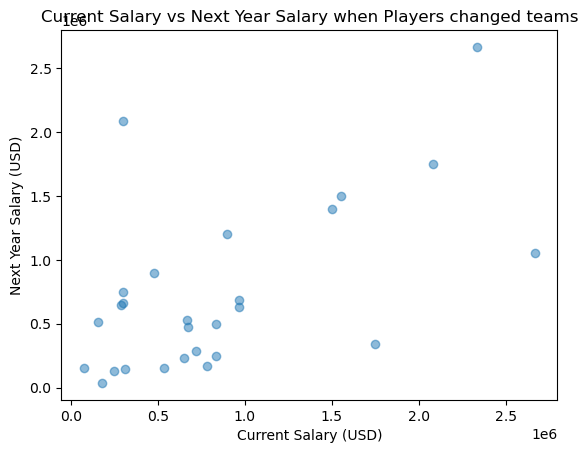

In [16]:
changed_teams_df = salary_salary_df[(salary_salary_df.changed_teams == 1)&(salary_salary_df['NY_SalaryUSD'] != salary_salary_df['SalaryUSD'])]
plt.scatter(changed_teams_df['SalaryUSD'], changed_teams_df['NY_SalaryUSD'], alpha=.5)
plt.xlabel("Current Salary (USD)")
plt.ylabel("Next Year Salary (USD)")
plt.title("Current Salary vs Next Year Salary when Players changed teams")
plt.show()

Let's also take a look at the breakdown of average salary by country.

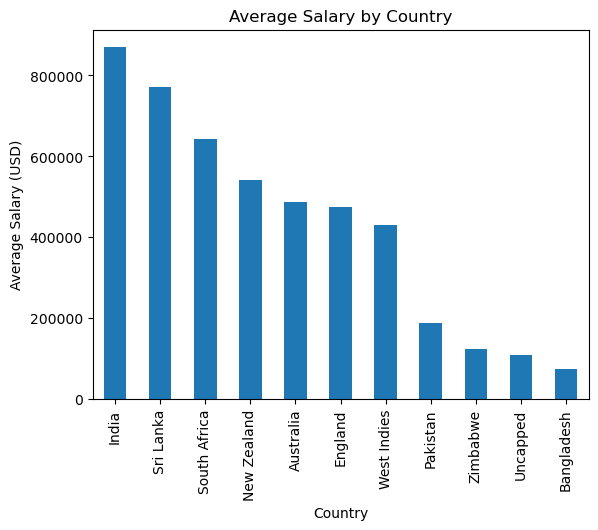

In [17]:
avg_by_country = batting_filtered.groupby('Country')['SalaryUSD'].mean()
avg_by_country = avg_by_country.sort_values(ascending=False)
avg_by_country.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Country')
plt.show()

Let us also take a look at the breakdown by role.

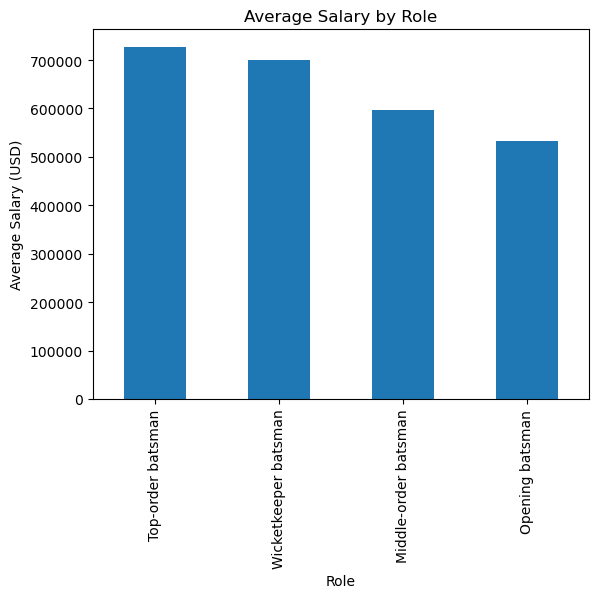

In [12]:
avg_by_role = batting_filtered.groupby('Role')['SalaryUSD'].mean()
avg_by_role = avg_by_role.sort_values(ascending=False)

avg_by_role.plot(kind='bar')
plt.xlabel('Role')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Role')
plt.show()